In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

In [30]:
N, D = 4, 2

In [31]:
T = np.array([0, 1, 1, 0])

In [32]:
xy = np.array(X[:,0] * X[:,1]).reshape(-1, 1)
xy

array([[0],
       [0],
       [0],
       [1]])

In [33]:
Xb = np.concatenate( (np.ones(shape=(N, 1)), xy, X), axis=1 )

In [34]:
Xb

array([[1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 1., 1., 1.]])

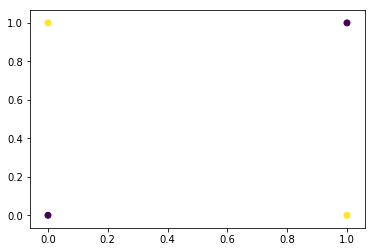

In [35]:
plt.scatter(X[:,0], X[:,1], c=T)
plt.show()

In [36]:
w = np.random.randn(D + 2)

# calculate the model output
z = Xb.dot(w)

def sigmoid(x):
    return 1/(1 + np.exp(-x))


Y = sigmoid(z)

In [37]:
Y

array([0.38253969, 0.32000637, 0.79699029, 0.78299467])

In [38]:
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

3.376301006303483
1.448396246136691
0.940200708033517
0.6390977935457394
0.44507253728376084
0.3130330145480565
0.21987273137997226
0.15283286622145867
0.10431548281010208
0.06943081279912704


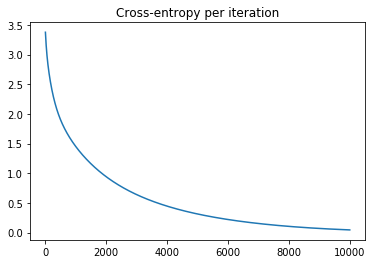

Final w: [ -3.96667724 -18.31804711   8.54045367   8.53963907]


In [39]:
# let's do gradient descent 100 times
learning_rate = 0.01
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w = w - learning_rate * ( Xb.T.dot(Y - T) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))
    
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

print("Final w:", w)

In [40]:
def classificationRate(y, yHat):
    return np.mean(y == yHat)

print("Final classification rate:", classificationRate(T, np.round(Y)))

Final classification rate: 1.0


In [41]:
Y

array([0.01858433, 0.98977824, 0.98978648, 0.00546109])